<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aquí en el ciclo for se fue gráficando los valores del Polinomio de legendre, se nota que en el primer termino $P_0(x)=1$ se muestra graficamente

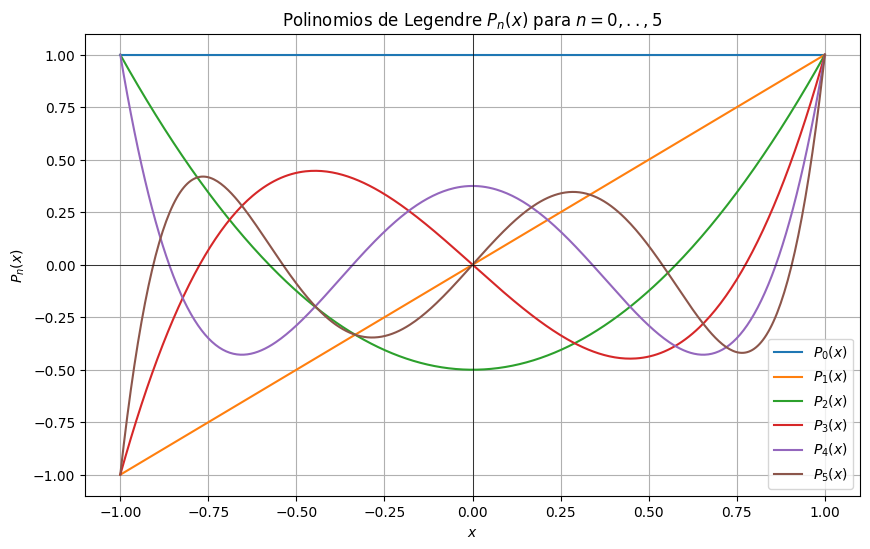

In [47]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

x_vals = np.linspace(-1, 1, 400)

plt.figure(figsize=(10, 6))


for n in range(6):
    Pn = legendre(n)
    y_vals = Pn(x_vals)
    plt.plot(x_vals, y_vals, label=f'$P_{n}(x)$')


plt.title('Polinomios de Legendre $P_n(x)$ para $n=0,..,5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

Aqui hicimos para n=3 el procedimiento similar al anterior sólo que aqui no se usa el ciclo for, y solo se grafica en n=3

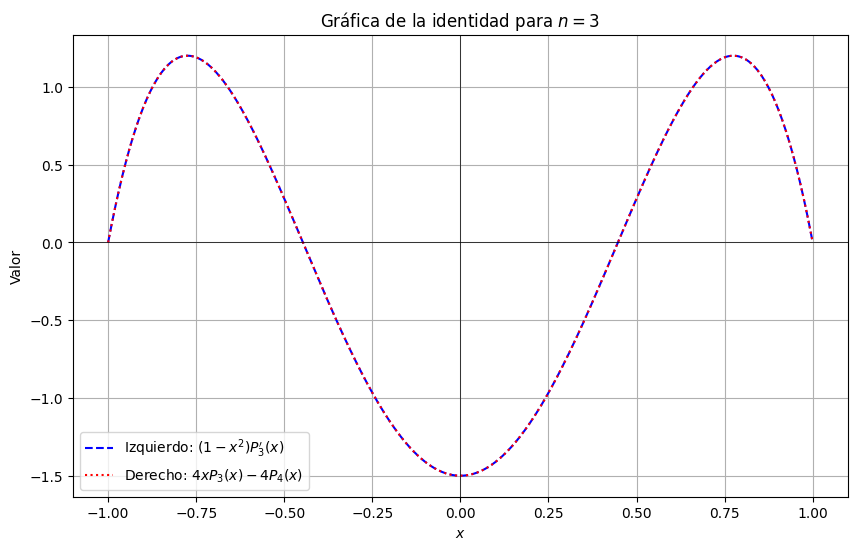

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

n = 3
x_vals = np.linspace(-1, 1, 400)

Pn = legendre(n)
Pn1 = legendre(n + 1)

Pn_deriv = Pn.deriv()

Izq = (1 - x_vals**2) * Pn_deriv(x_vals)

Der = (n + 1) * x_vals * Pn(x_vals) - (n + 1) * Pn1(x_vals)


plt.figure(figsize=(10, 6))
plt.plot(x_vals, Izq, label='Izquierdo: $(1 - x^2) P_3\'(x)$', linestyle='--', color= 'blue')
plt.plot(x_vals, Der, label='Derecho: $4xP_3(x) - 4P_4(x)$', linestyle=':', color= 'red')

plt.title('Gráfica de la identidad para $n = 3$')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

Aqui se muestra algebraicamente que se cumple la relacion en n= 3

In [49]:

from sympy import symbols, diff, legendre, expand, simplify, Eq

x = symbols('x')
n = 3

P_n = legendre(n, x)
P_n1 = legendre(n + 1, x)
P_n_1 = legendre(n - 1, x)

Algebreo = (n + 1)*P_n1 - (2*n + 1)*x*P_n + n*P_n_1

simplified_expr = simplify(expand(Algebreo))

print("Polinomios de Legendre:")
print(f"P_{n}(x) = {P_n}")
print(f"P_{n+1}(x) = {P_n1}")
print(f"P_{n-1}(x) = {P_n_1}\n")

print("Tenemos:")
print(f"(n+1)P_{n+1}(x) - (2n+1)xP_{n}(x) + nP_{n-1}(x) = {Algebreo}\n")

print("Resultado:")
print(simplified_expr)

Polinomios de Legendre:
P_3(x) = 5*x**3/2 - 3*x/2
P_4(x) = 35*x**4/8 - 15*x**2/4 + 3/8
P_2(x) = 3*x**2/2 - 1/2

Tenemos:
(n+1)P_4(x) - (2n+1)xP_3(x) + nP_2(x) = 35*x**4/2 - 21*x**2/2 - 7*x*(5*x**3/2 - 3*x/2)

Resultado:
0


Aqui le hago print a los resultados para mostrar que evidentemente son iguales

In [51]:
from sympy import symbols, diff, factorial, legendre, simplify, expand

x = symbols('x')

def rodrigues_formula(n):
    """Calcula el polinomio de Legendre usando la fórmula de Rodrigues"""
    return (1/(2**n * factorial(n))) * diff((x**2 - 1)**n, x, n)

# Verificamos para n = 0 a 5
print("Verificación de la fórmula de Rodrigues para Pₙ(x):")
for n in range(6):
    P_rodrigues = expand(rodrigues_formula(n))
    P_legendre = legendre(n, x)

    print(f"\nn = {n}:")
    print(f"Rodrigues: {P_rodrigues}")
    print(f"SymPy:     {P_legendre}")


Verificación de la fórmula de Rodrigues para Pₙ(x):

n = 0:
Rodrigues: 1
SymPy:     1

n = 1:
Rodrigues: x
SymPy:     x

n = 2:
Rodrigues: 3*x**2/2 - 1/2
SymPy:     3*x**2/2 - 1/2

n = 3:
Rodrigues: 5*x**3/2 - 3*x/2
SymPy:     5*x**3/2 - 3*x/2

n = 4:
Rodrigues: 35*x**4/8 - 15*x**2/4 + 3/8
SymPy:     35*x**4/8 - 15*x**2/4 + 3/8

n = 5:
Rodrigues: 63*x**5/8 - 35*x**3/4 + 15*x/8
SymPy:     63*x**5/8 - 35*x**3/4 + 15*x/8
